<a href="https://colab.research.google.com/github/Utkarsh-Mishra444/BS-191/blob/main/BS191_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pims
!pip install trackpy

Frame 19: 576 trajectories present.


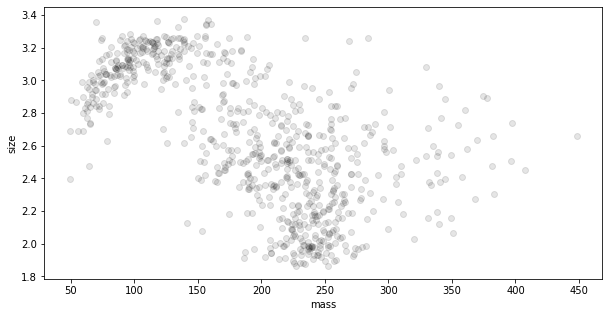

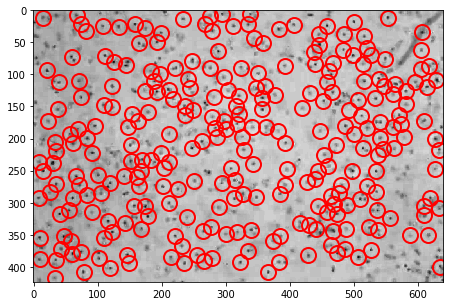

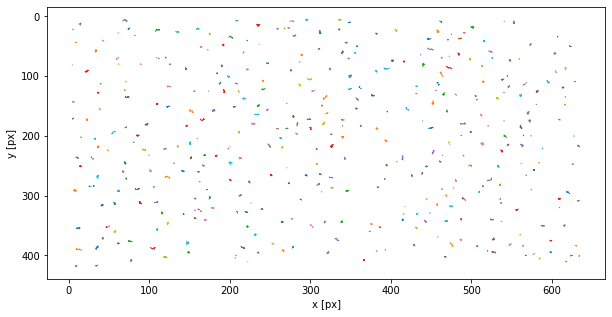

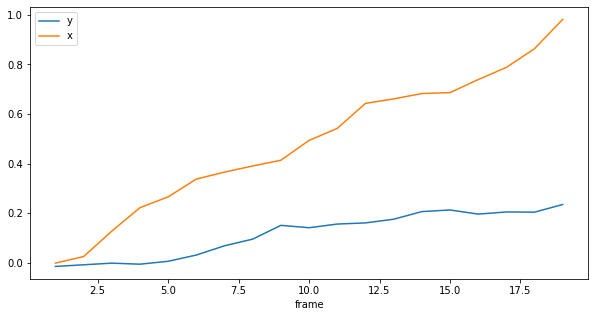

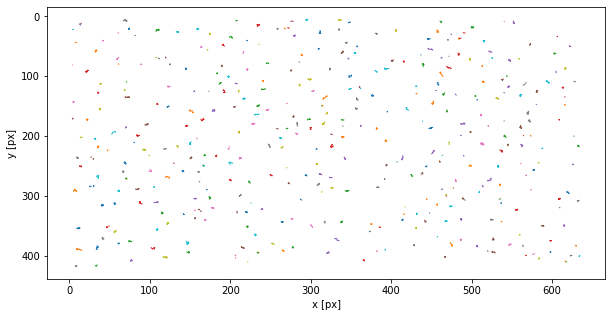

/usr/local/lib/python3.7/dist-packages/trackpy/motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
/usr/local/lib/python3.7/dist-packages/trackpy/motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


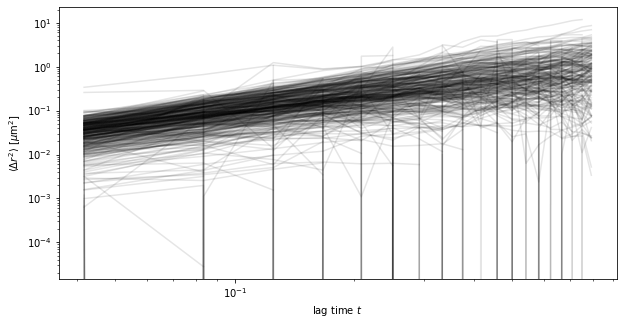

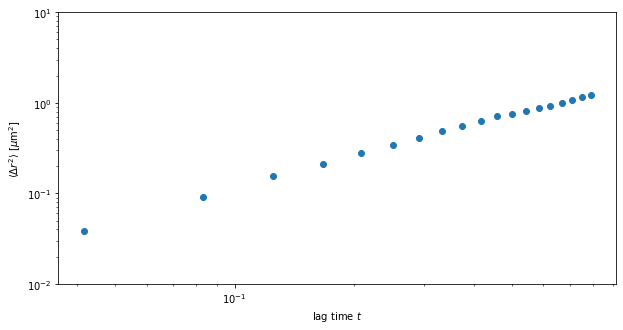

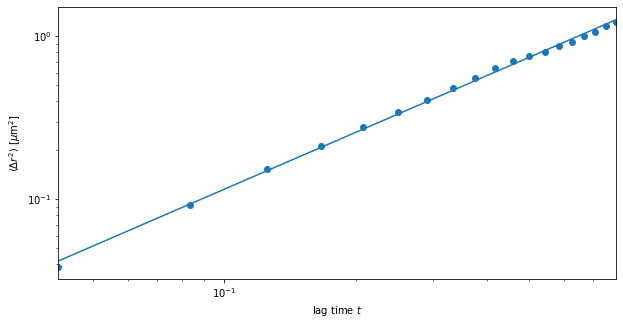

,n,A
msd,1.158628,1.664572


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series 

import pims
import trackpy as tp


# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

@pims.pipeline
def gray(image):
    return image[:, :, 1] #converts to greyscale 

frames = gray(pims.open('data2/*.png')) # opens the folder containing all the tif files
# stores them as a measure of intensity 

#calls tp.locate on each frame and collects the results
f = tp.batch(frames[:20], 11, minmass=20, invert=True);  # locates and results the characteristics of each particle
#f consists of 5 columns of data, one 'row' for each particle in the image. The numbers are (1) x-centroid (2) y-centroid (3) total brightness(mass) (4) radius of gyration and (5) 'eccentricity' which is 0 for circles and 1 for lines. 
 
t = tp.link(f, 5, memory=2) # define the max displacement (5)
t1 = tp.filter_stubs(t, 4) # removing particles that appear on only few frames

plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # mean position of the particle

t2 = t1[((t1['mass'] > 50) & (t1['size'] < 2.6) &
         (t1['ecc'] < 1.2))]                  #filtering based on features 
tp.annotate(t2[t2['frame'] == 0], frames[0]);     

plt.figure()
tp.plot_traj(t2); 


d = tp.compute_drift(t2)
d.plot()
plt.show()

tm = tp.subtract_drift(t2.copy(), d)
ax = tp.plot_traj(tm)
plt.show()

im = tp.imsd(tm, 100/285., 24) # taking arbitrary values of microns per pixel = 100/285., frames per second = 24
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

# finding the ensemble mean square displacement 
em = tp.emsd(tm, 100/285., 24)
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10))

plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots

Frame 19: 230 trajectories present.


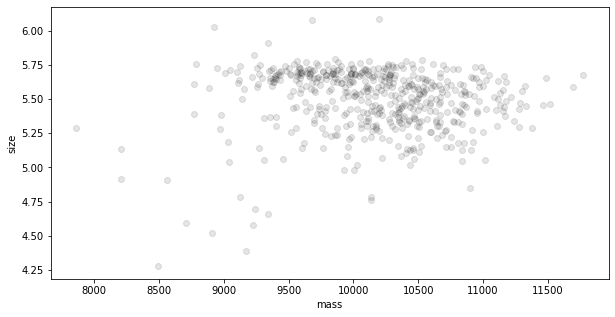

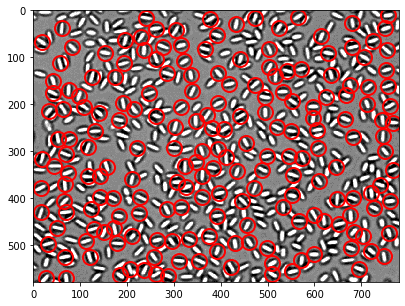

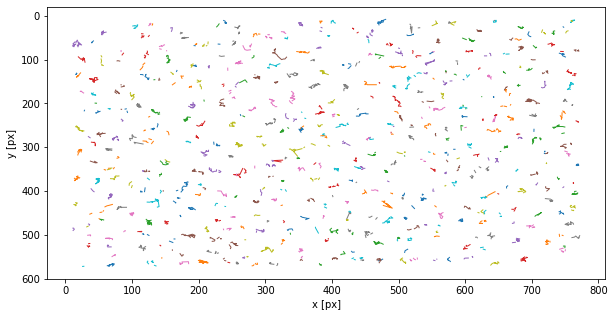

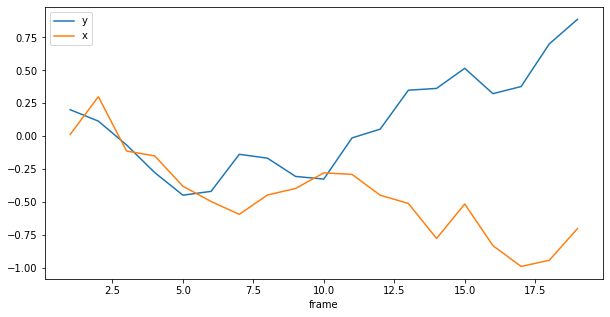

ValueError: ignored

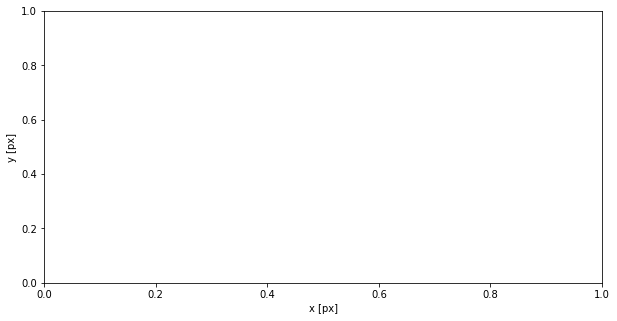

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series 

import pims
import trackpy as tp


# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

frames = pims.open('data3/*.png') # opens the folder containing all the tif files
# stores them as a measure of intensity 

f = tp.batch(frames[:20], 21);
t = tp.link(f, 15, memory=3)
t1 = tp.filter_stubs(t, 3)
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass
plt.figure()
tp.annotate(t1[t1['frame'] == 0], frames[0]);

plt.figure()
tp.plot_traj(t1);

d = tp.compute_drift(t1)
d.plot()
plt.show()

tm = tp.subtract_drift(t2.copy(), d)
ax = tp.plot_traj(tm)
plt.show()